In [27]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline

In [28]:
import warnings
warnings.filterwarnings('ignore')

In [29]:
df = pd.read_csv("breast_cancer_data.csv")
df = df.drop(['id','Unnamed: 32'], axis = 1)
df = df.rename(columns={'concave points_mean':'concave_points_mean', 'concave points_worst':'concave_points_worst'})
df['diagnosis'] = df['diagnosis'].replace({'M':1,'B':0})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [30]:
df.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [31]:
# не маловато ли наблюдений?
df.shape

(569, 31)

In [32]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [33]:
df.isnull().sum()/len(df)

diagnosis                  0.0
radius_mean                0.0
texture_mean               0.0
perimeter_mean             0.0
area_mean                  0.0
smoothness_mean            0.0
compactness_mean           0.0
concavity_mean             0.0
concave_points_mean        0.0
symmetry_mean              0.0
fractal_dimension_mean     0.0
radius_se                  0.0
texture_se                 0.0
perimeter_se               0.0
area_se                    0.0
smoothness_se              0.0
compactness_se             0.0
concavity_se               0.0
concave points_se          0.0
symmetry_se                0.0
fractal_dimension_se       0.0
radius_worst               0.0
texture_worst              0.0
perimeter_worst            0.0
area_worst                 0.0
smoothness_worst           0.0
compactness_worst          0.0
concavity_worst            0.0
concave_points_worst       0.0
symmetry_worst             0.0
fractal_dimension_worst    0.0
dtype: float64

---
# Визуализация

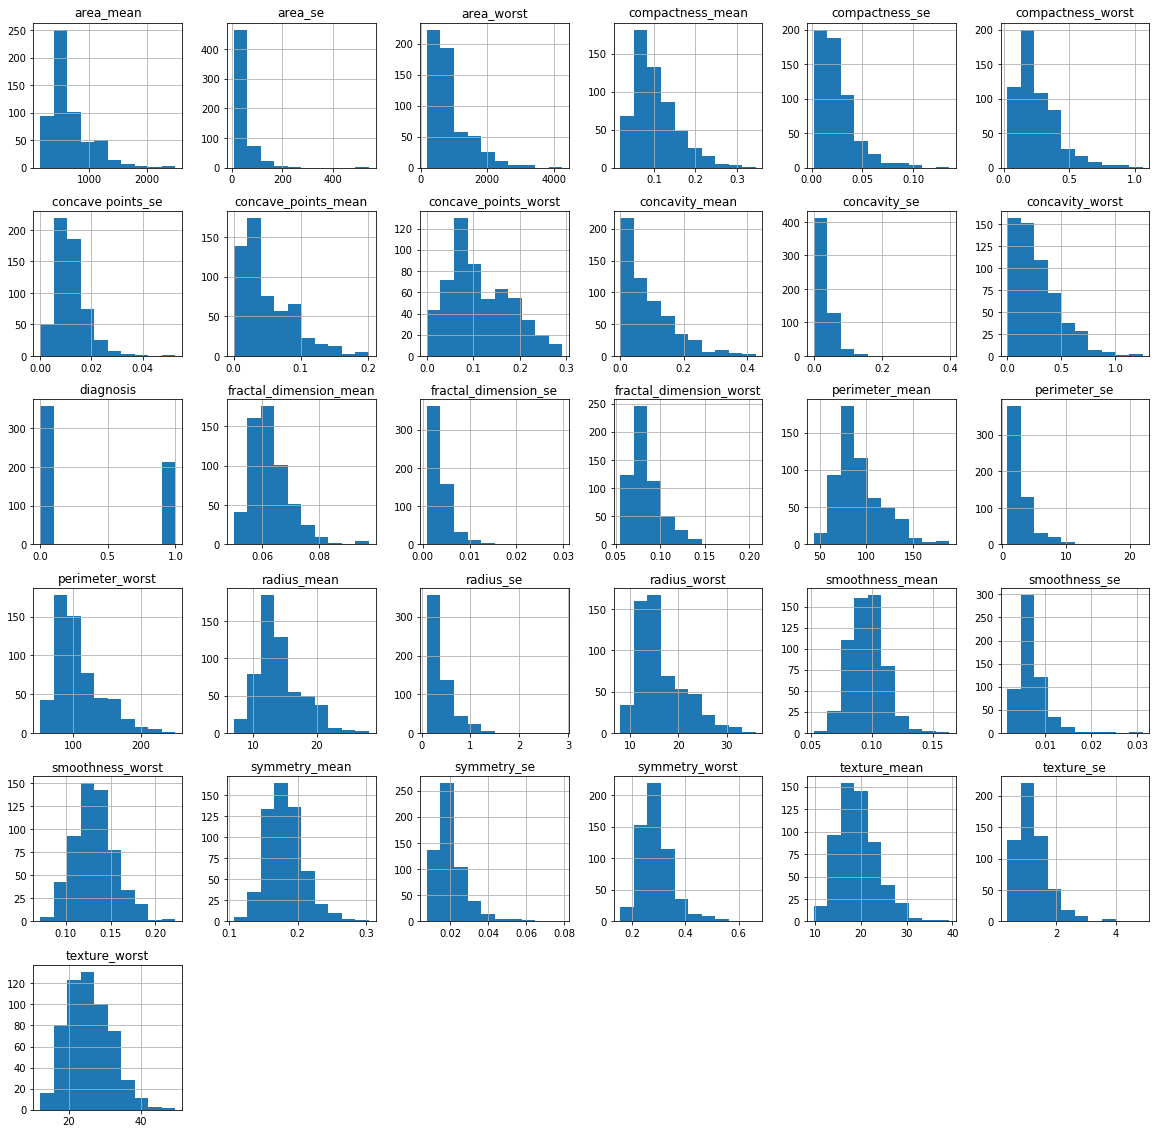

In [34]:
df.hist(figsize=(20, 20));

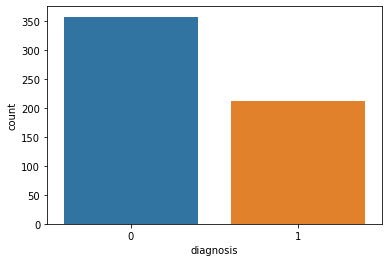

In [35]:
sns.countplot(x='diagnosis',data=df);

---
# Исключаем сильно скоррелированные признаки

In [36]:
Corr = df.corr()
Corr

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave_points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [37]:
MaxCorrFields = []
for i in Corr:
    for j in Corr.index[Corr[i] > 0.85]:
        if i != j and j not in MaxCorrFields and i not in MaxCorrFields:
            MaxCorrFields.append(i)
            MaxCorrFields.append(j)
            print (i, j, Corr[i][Corr.index == j].values[0])
print(MaxCorrFields, '\nStrong coorr feature count:', len(MaxCorrFields))
#собираем списиок сильно коррелирующих признаков, чтобы исключить из датасета

radius_mean perimeter_mean 0.9978552814938113
texture_mean texture_worst 0.9120445888404215
area_mean radius_worst 0.9627460860470841
compactness_mean concavity_mean 0.8831206701772499
concave_points_mean perimeter_worst 0.8559231281343112
radius_se perimeter_se 0.9727936770160752
compactness_worst concavity_worst 0.8922608987764692
['radius_mean', 'perimeter_mean', 'texture_mean', 'texture_worst', 'area_mean', 'radius_worst', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'perimeter_worst', 'radius_se', 'perimeter_se', 'compactness_worst', 'concavity_worst'] 
Strong coorr feature count: 14


In [38]:
df_drop_corr = df.drop(MaxCorrFields, axis = 1)
df_drop_corr.head()

,diagnosis,smoothness_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,area_worst,smoothness_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,0.11840,0.2419,0.07871,0.9053,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,2019.0,0.1622,0.2654,0.4601,0.11890
1,1,0.08474,0.1812,0.05667,0.7339,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,1956.0,0.1238,0.1860,0.2750,0.08902
2,1,0.10960,0.2069,0.05999,0.7869,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,1709.0,0.1444,0.2430,0.3613,0.08758
3,1,0.14250,0.2597,0.09744,1.1560,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,567.7,0.2098,0.2575,0.6638,0.17300
4,1,0.10030,0.1809,0.05883,0.7813,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,1575.0,0.1374,0.1625,0.2364,0.07678


---
# Дополнительные импорты и определение функций

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [52]:
from sklearn.metrics import roc_auc_score, roc_curve
def plot_roc_curve(prob_prediction, actual):
    fpr, tpr, thresholds = roc_curve(y_test, prob_prediction)
    auc_score = roc_auc_score(y_test, prob_prediction)
    
    plt.plot(fpr, tpr, label='ROC curve ')
    plt.plot([0, 1], [0, 1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC AUC: {:.3f}'.format(auc_score))
    plt.show()

In [65]:
def quality_report(prediction, actual, verbose=True):
    report_str = "Accuracy: \t {:.3f}\n" +\
                 "Precision: \t {:.3f}\n" +\
                 "Recall: \t {:.3f}\n" +\
                 "f1_score: \t {:.3f}\n" +\
                 "ROC-AUC: \t {:.3f}"
    
    acc = accuracy_score(prediction, actual)
    precision = precision_score(prediction, actual)
    recall = recall_score(prediction, actual)
    f1 = f1_score(prediction, actual)
    rocauc = roc_auc_score(prediction, actual)
    
    quality_list = [acc.round(5), precision.round(5), recall.round(5), f1, rocauc.round(5)]
    
    if verbose:
        print("\n=== Quality Report ===")
        print(report_str.format(
            accuracy_score(prediction, actual),
            precision_score(prediction, actual),
            recall_score(prediction, actual),
            f1_score(prediction, actual),
            roc_auc_score(prediction, actual)
        ))
        print("======================\n")
    
    return quality_list


---
# Обучение на всех признаках

In [66]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['diagnosis'], axis=1), 
    df['diagnosis'], 
    test_size=0.30, 
    random_state=42, 
    stratify=df['diagnosis']
)

# шкалируем признаки
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [67]:
log_reg = LogisticRegression()

log_reg.fit(X_train_scaled, y_train)
quality_list_baseline_test = quality_report(log_reg.predict(X_test_scaled), y_test)
df_quality = pd.DataFrame(columns=["Accuracy", "Precision", "Recall", "F1", "ROC-AUC"])
df_quality.loc["baseline_test", :] = quality_list_baseline_test
df_quality.round(3)


=== Quality Report ===
Accuracy: 	 0.971
Precision: 	 0.938
Recall: 	 0.984
f1_score: 	 0.960
ROC-AUC: 	 0.974



,Accuracy,Precision,Recall,F1,ROC-AUC
baseline_test,0.97076,0.9375,0.98361,0.96,0.97362


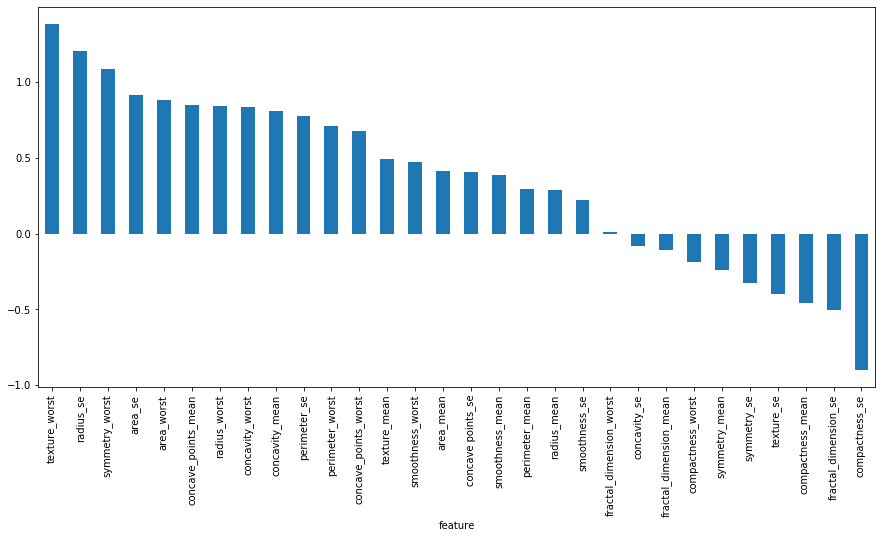

In [68]:
featureImportance = pd.DataFrame({"feature": df.drop('diagnosis',axis=1).columns, 
                                  "importance": log_reg.coef_[0]})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot(kind = 'bar', figsize=(15, 7));

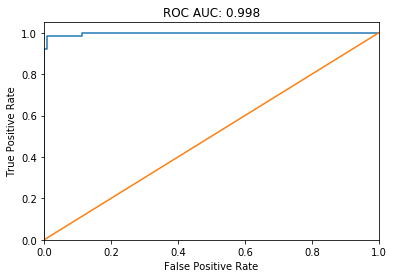

In [69]:
plot_roc_curve(log_reg.predict_proba(X_test_scaled)[:,1], y_test)

---
# Обучение на признаках без корреляций

In [70]:
X_train, X_test, y_train, y_test = train_test_split(
    df_drop_corr.drop(['diagnosis'], axis=1), 
    df_drop_corr['diagnosis'], 
    test_size=0.30, 
    random_state=42, 
    stratify=df['diagnosis']
)

# шкалируем признаки
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [71]:
log_reg = LogisticRegression()

log_reg.fit(X_train_scaled, y_train)
quality_list_drop_corr_test = quality_report(log_reg.predict(X_test_scaled), y_test)
df_quality.loc["drop_corr_test", :] = quality_list_drop_corr_test
df_quality.round(3)


=== Quality Report ===
Accuracy: 	 0.977
Precision: 	 0.953
Recall: 	 0.984
f1_score: 	 0.968
ROC-AUC: 	 0.978



,Accuracy,Precision,Recall,F1,ROC-AUC
baseline_test,0.97076,0.9375,0.98361,0.96,0.97362
drop_corr_test,0.97661,0.95312,0.98387,0.968254,0.97817


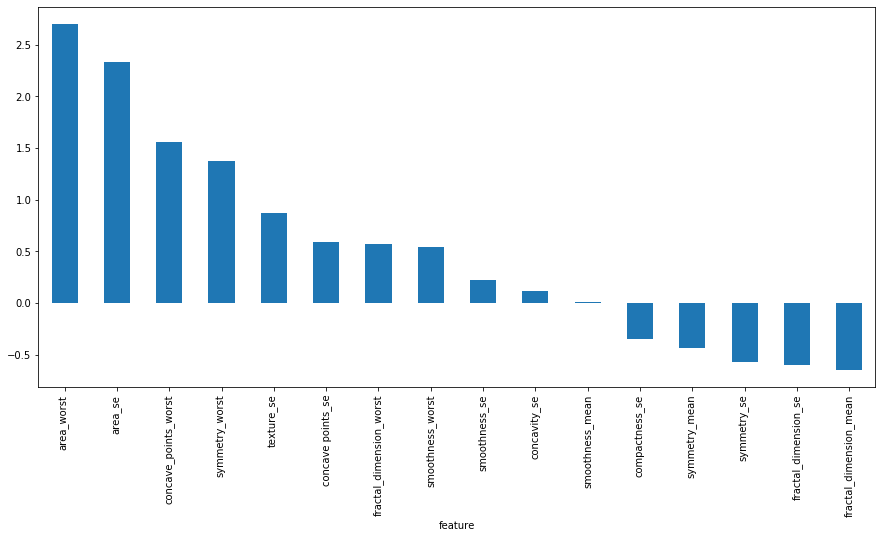

In [72]:
featureImportance = pd.DataFrame({"feature": df_drop_corr.drop('diagnosis',axis=1).columns, 
                                  "importance": log_reg.coef_[0]})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot(kind = 'bar', figsize=(15, 7));

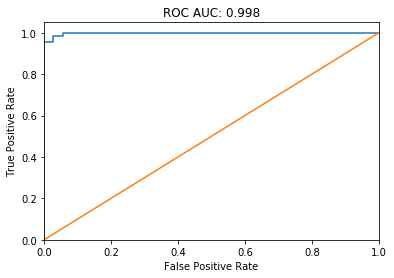

In [73]:
plot_roc_curve(log_reg.predict_proba(X_test_scaled)[:,1], y_test)

---
# Настройка параметра на кросс-валидации

In [80]:
X_train, X_test, y_train, y_test = train_test_split(
    df_drop_corr.drop(['diagnosis'], axis=1), 
    df_drop_corr['diagnosis'], 
    test_size=0.30, 
    random_state=42, 
    stratify=df['diagnosis']
)

# шкалируем признаки
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [84]:
log_reg_cv = LogisticRegressionCV(Cs=100)
log_reg_cv.fit(X_train_scaled, y_train)
quality_list_CV_test = quality_report(log_reg.predict(X_test_scaled), y_test)
df_quality.loc["CV", :] = quality_list_CV_test
df_quality.round(3)


=== Quality Report ===
Accuracy: 	 0.977
Precision: 	 0.953
Recall: 	 0.984
f1_score: 	 0.968
ROC-AUC: 	 0.978



,Accuracy,Precision,Recall,F1,ROC-AUC
baseline_test,0.97076,0.9375,0.98361,0.96,0.97362
drop_corr_test,0.97661,0.95312,0.98387,0.968254,0.97817
CV,0.97661,0.95312,0.98387,0.968254,0.97817


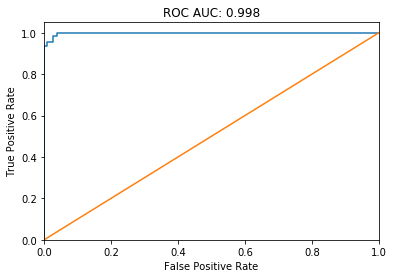

In [86]:
plot_roc_curve(log_reg_cv.predict_proba(X_test_scaled)[:,1], y_test)

---
# kNN + CV

In [88]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
        'n_neighbors': range(1, 50),
        'p': range(1, 4)
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_scaled, y_train)

print("Best CV score: {:.3f}, best CV k: {}".format(
    grid_search.best_score_, grid_search.best_estimator_.n_neighbors)
) 

quality_list_kNN_CV_test = quality_report(grid_search.best_estimator_.predict(X_test_scaled), y_test)
df_quality.loc["kNN_CV", :] = quality_list_kNN_CV_test
df_quality.round(3)

Best CV score: 0.924, best CV k: 1

=== Quality Report ===
Accuracy: 	 0.947
Precision: 	 0.891
Recall: 	 0.966
f1_score: 	 0.927
ROC-AUC: 	 0.952



,Accuracy,Precision,Recall,F1,ROC-AUC
baseline_test,0.97076,0.9375,0.98361,0.96,0.97362
drop_corr_test,0.97661,0.95312,0.98387,0.968254,0.97817
CV,0.97661,0.95312,0.98387,0.968254,0.97817
kNN_CV,0.94737,0.89062,0.9661,0.926829,0.9518


In [ ]:
#логистический мир победил - коэффициент оказался сильней